In [40]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
from scipy import linalg
%matplotlib notebook

In [41]:
# General definitions
# Pauli matrices
Sx = sp.matrix([[0,1],[1,0]])
Sy = sp.matrix([[0,-1j],[1j,0]])
Sz = sp.matrix([[1,0],[0,-1]])
Id = sp.matrix([[1,0],[0,1]])

In [96]:
# Numerical params
dt = 0.01
T = 2000

# Physical params
w = 1.0
g1 = 0.1
g2 = 0.1

a = 1/sp.sqrt(2)
b = 1/sp.sqrt(2)

F1 = sp.sqrt(g1)*sp.matrix([[0,1],[0,0]])
F2 = sp.sqrt(g2)*sp.matrix([[0,0],[1,0]])

# Hamiltonian and time evolution operator
H = (-w*Sz - 1j*F1.H*F1 - 1j*F2.H*F2).getA()
Ut = sp.matrix(sp.linalg.expm(-1j*H*dt))

In [97]:
# Evolve in time
psi = a*sp.matrix([[1],[0]]) + b*sp.matrix([[0],[1]])

psi_t = sp.empty((T+1,2)) * 0j
psi_t[0,:] = psi.T.getA()
E_Sx = sp.empty(T+1)
for t in range(1,T+1):
    p1 = (psi.H*F1.H*F1*psi)*dt
    p2 = (psi.H*F2.H*F2*psi)*dt
    eps = sp.random.rand()
    if((p1+p2)>=eps):
        #Do jump
        eps2 = sp.random.rand()
        if(eps2 < p1/(p1+p2)):
            #Do F1
            psi = F1*psi
        else:
            #Do F2
            psi = F2*psi
        psi = psi/sp.linalg.norm(psi)
    else:
        #evolve using H_eff
        psi = Ut*psi
        psi = psi/sp.linalg.norm(psi)
    psi_t[t,:] = psi.T.getA()
    E_Sx[t] = (psi.H*Sx*psi).getA()[0][0].real

    

<IPython.core.display.Javascript object>


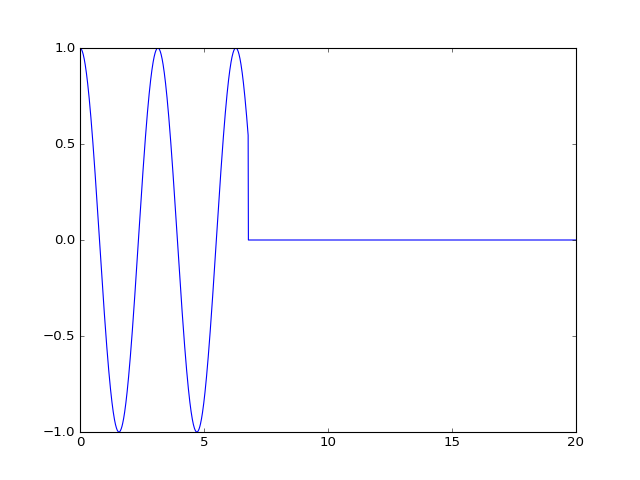

In [98]:
plt.plot(sp.arange(T+1)*dt,E_Sx)